<div style="padding:20px; 
            color:aqua;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color:Purple;
            background-color:Blue;
            overflow:hidden;
            font-weight:500">Customer Lifetime Value Prediction </div>

<div style="padding:20px; 
            color:aqua;
            margin:10px;
            font-size:100%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color:Purple;
            background-color:Brown;
            overflow:hidden;
            font-weight:500"> Customer Lifetime Value Prediction

Customer Lifetime Value represents a customer’s value to a company over a period of time. It’s a competitive market for insurance companies in 2019, and insurance premium isn’t the only determining factor in a customer’s decisions. CLV is a customer-centric metric, and a powerful base to build upon to retain valuable customers, increase revenue from less valuable customers, and improve the customer experience overall.

## Business Problem
An Auto Insurance company in the USA is facing issues in retaining its customers and wants to advertise promotional offers for its loyal customers. They are considering Customer Lifetime Value CLV as a parameter for this purpose. Customer Lifetime Value represents a customer’s value to a company over a period of time. It’s a competitive market for insurance companies, and the insurance premium isn’t the only determining factor in a customer’s decisions. CLV is a customer-centric metric, and a powerful base to build upon to retain valuable customers, increase revenue from less valuable customers, and improve the customer experience overall. Using CLV effectively can improve customer acquisition and customer retention, prevent churn, help the company to plan its marketing budget, measure the performance of their ads in more detail, and much more.

## Project Overview
- The objective of the problem is to accurately predict the Customer Lifetime Value(CLV) of the customer for an Auto Insurance Company
- Performed EDA to understand the relation of target variable CLV with the other features.
- Statistical Analysis techniques like OLS for numerical and Mann–Whitney U and also Kruskal Wallis test for the categorical variables were performed to find the significance of the features with respect to the target.
- Supervised Regression Models like Linear Regression, Ridge Regression, Lasso Regression, DecisionTree Regression, Random Forest Regression and Adaboost Regression.
- Using GridSearchCV with Random Forest Regression gave the best RMSE and R^2 score values

## Dataset Description
The dataset represents Customer lifetime value of an Auto Insurance Company in the United States, it includes over 24 features and 9134 records to analyze the lifetime value of Customer.</div>

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Default theme
sns.set_theme(palette='Set2',
              font='Lucida Calligraphy',
              font_scale=1.0,
             )

import matplotlib
matplotlib.rcParams.update({'font.size': 10})
plt.style.use('dark_background')

In [3]:
df=pd.read_csv("AutoInsurance.csv")



In [4]:
df.sample(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
4060,LV89056,California,3133.018242,No,Extended,Bachelor,1/18/11,Unemployed,F,0,...,14,1,1,Personal Auto,Personal L2,Offer1,Call Center,655.200000,Four-Door Car,Medsize
6046,ZG82127,California,12741.847540,Yes,Basic,Bachelor,7/1/2011,Employed,F,73054,...,36,1,2,Corporate Auto,Corporate L3,Offer1,Branch,419.365958,SUV,Medsize
2913,HL40930,Oregon,7150.225367,No,Extended,Bachelor,2/22/11,Employed,M,63651,...,10,0,3,Personal Auto,Personal L3,Offer2,Branch,224.711836,Four-Door Car,Large
8868,II32272,California,25390.545460,No,Extended,High School or Below,2/17/11,Disabled,F,19359,...,62,0,2,Personal Auto,Personal L3,Offer4,Call Center,928.800000,Sports Car,Medsize
8513,DI45039,California,2754.143877,No,Basic,College,3/1/2011,Employed,F,58705,...,95,0,1,Personal Auto,Personal L2,Offer4,Web,48.956424,Two-Door Car,Medsize


In [5]:
print("The number of rows:",df.shape[0])
print("The number of columns:",df.shape[1])

The number of rows: 9134
The number of columns: 24


In [6]:
df.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   CLV                            9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [8]:
numerical_cols = df.select_dtypes(include=["int64","float64"])

In [9]:
numerical_cols.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [10]:
numerical_cols = numerical_cols.drop(["Number of Policies","Number of Open Complaints"],axis=1)

## Summary Statistics of Numerical features

In [11]:
numerical_cols.describe()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


## Checking Null values

In [12]:
df.isnull().sum()

Customer                         0
State                            0
CLV                              0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

There are no null values in the data

## EDA

## Numerical Features

### CLV - Target variable analysis

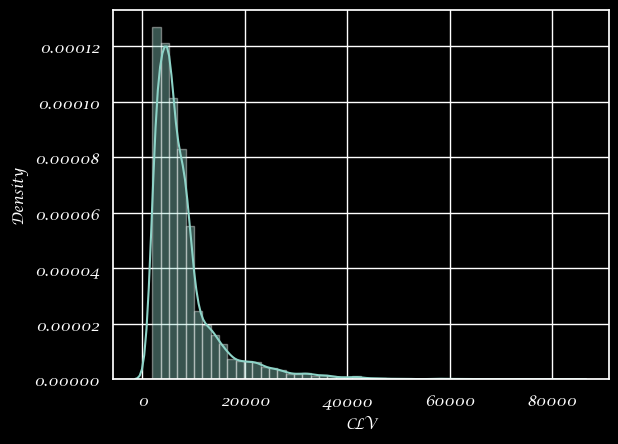

In [13]:
sns.distplot(df["CLV"])
# plt.savefig("CLV.png")
plt.show()

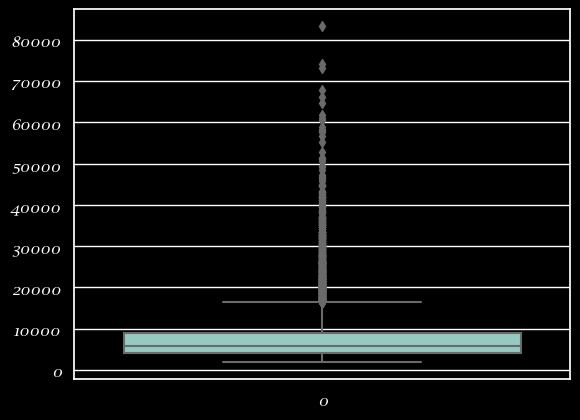

In [14]:
sns.boxplot(df["CLV"])
plt.show()

In [15]:
df["CLV"].skew()

3.0322802599299847

From the distribution and box plot we can infer that CLV is highly right skewed. There are lot of outliers in our dependent variable but we cant treat them directly because they are influential points.

### Income

**Univariate Analysis**

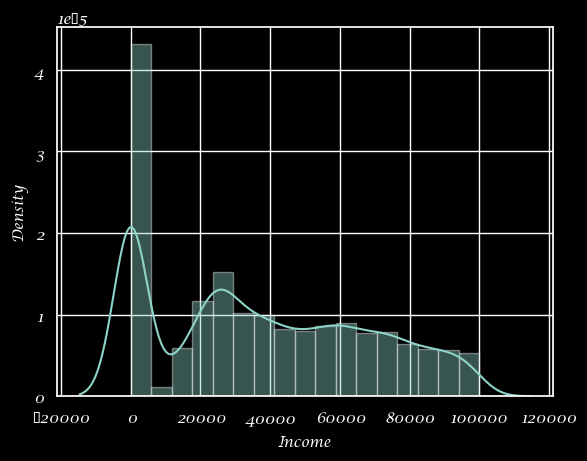

In [16]:
sns.distplot(df["Income"])
plt.show()

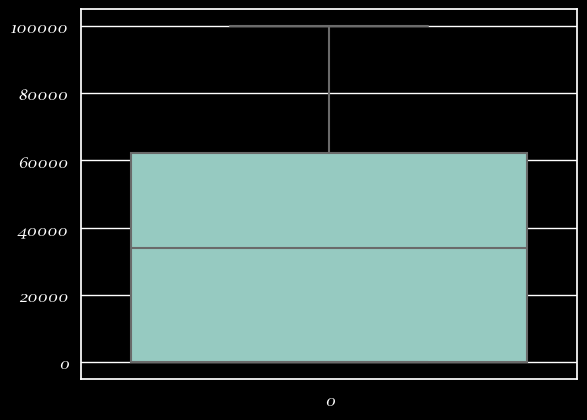

In [17]:
sns.boxplot(df["Income"])
plt.show()

**Bivariate Analysis**

### Monthly Premium Auto

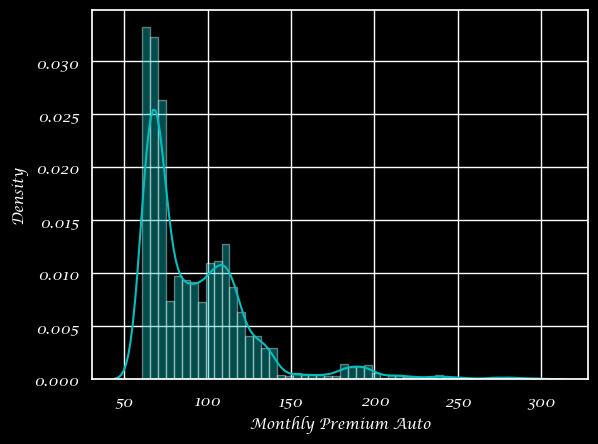

In [18]:
sns.distplot(df["Monthly Premium Auto"],color='c')
plt.show()

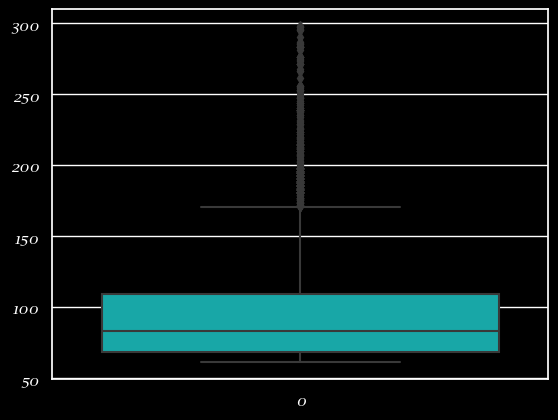

In [19]:
sns.boxplot(df["Monthly Premium Auto"],color='c')
plt.show()

### Months Since Last Claim

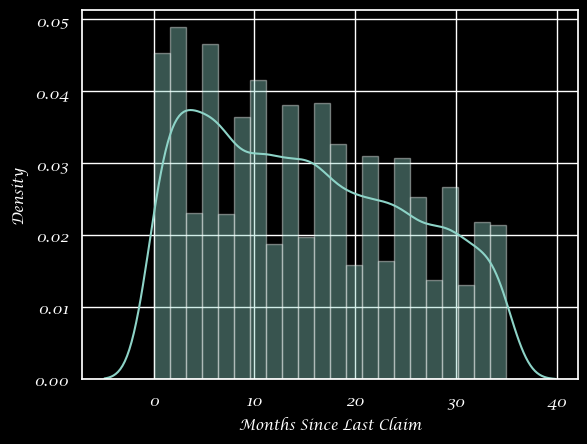

In [20]:
sns.distplot(df['Months Since Last Claim'])
plt.show()

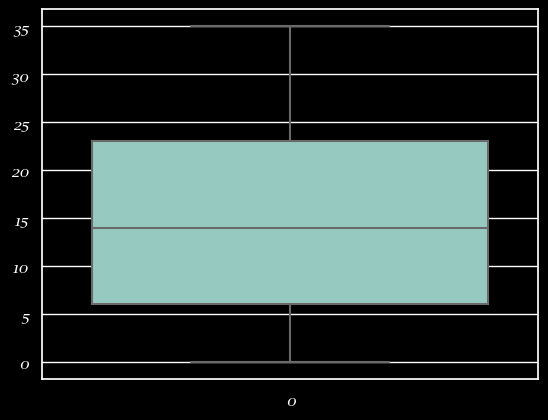

In [21]:
sns.boxplot(df["Months Since Last Claim"])
plt.show()

There is no linear relationship

### Months Since Policy Inception

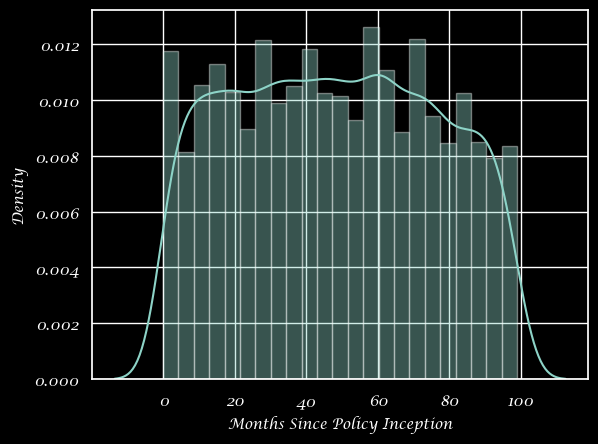

In [22]:
sns.distplot(df['Months Since Policy Inception'])
plt.show()

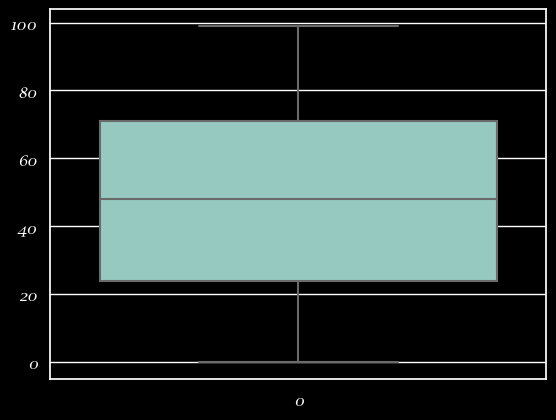

In [23]:
sns.boxplot(df["Months Since Policy Inception"])
plt.show()

### Total claim amount

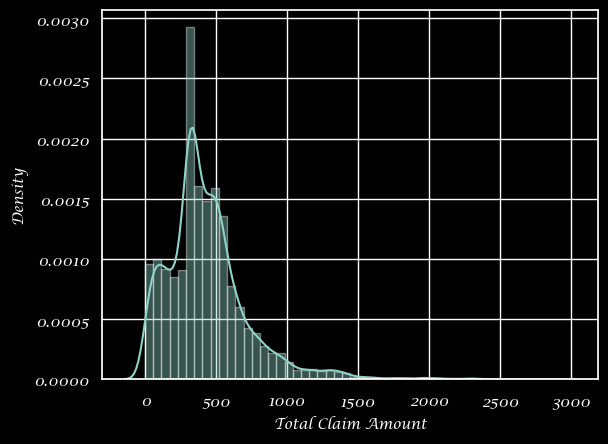

In [24]:
sns.distplot(df['Total Claim Amount'])
plt.show()

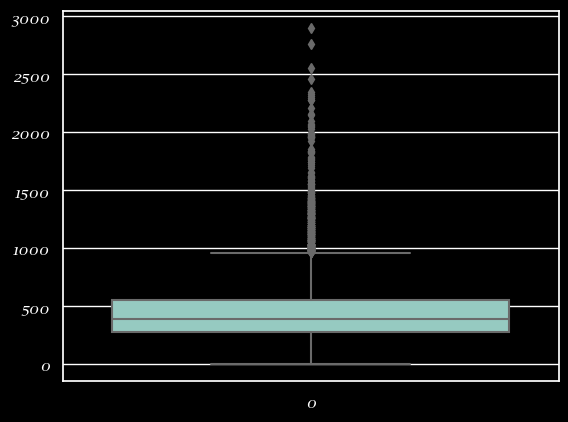

In [25]:
sns.boxplot(df["Total Claim Amount"])
plt.show()

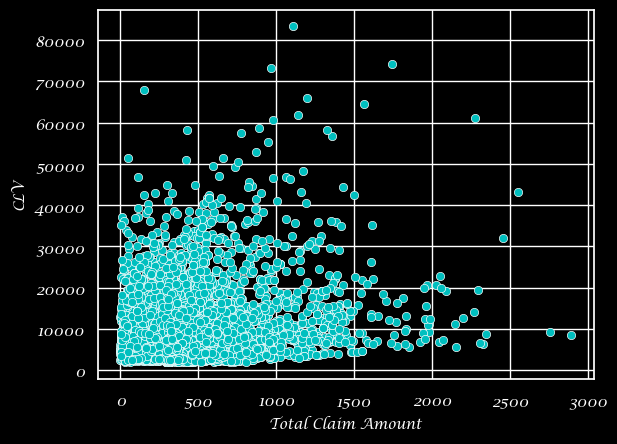

In [26]:
sns.scatterplot(x=df["Total Claim Amount"],y=df["CLV"],color='c')
plt.show()

There is a linear relationship between CLV and Total Claim Amount

The monthly premium auto and income feature has multiple peak's so to remove those peaks we can apply any of the power transformation (SQUARE / CUBE)

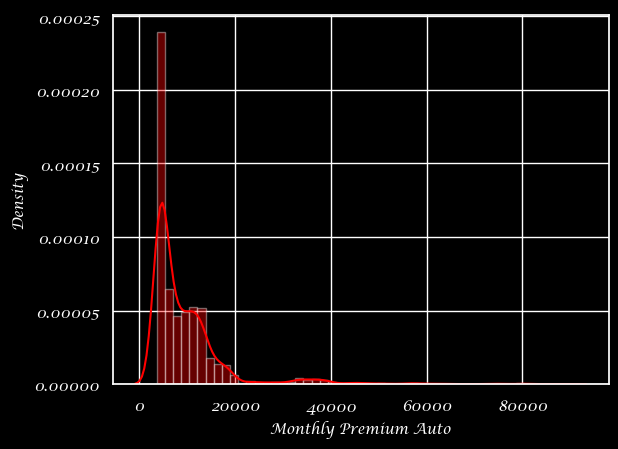

In [27]:
sns.distplot(np.square(df["Monthly Premium Auto"]),color='r')
plt.show()

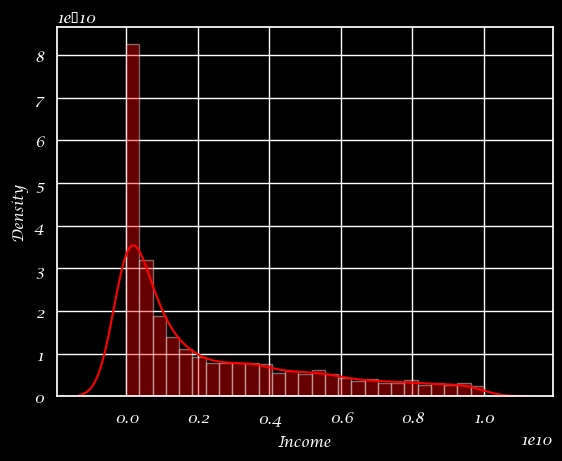

In [28]:
sns.distplot(np.square(df["Income"]),color='r')
plt.show()

But as we can see that after the square transformation the data is getting heavily skewed, so we stick with the actual distribution again. We will just stick with the actual distribution of the feature in our model building.

## Categorical variables

In [29]:
cat_cols = df.select_dtypes(include="object")

In [30]:
no_col = df[["Number of Open Complaints","Number of Policies"]]

In [31]:
cat_cols = pd.concat([cat_cols,no_col],axis=1)

In [32]:
cat_cols.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [33]:
cat_cols.drop("Effective To Date",axis=1,inplace=True)

In [34]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [35]:
for i in cat_cols:
    print("Unique values in",str(i),"is",df[i].nunique())
    print(df[i].value_counts())
    print("-----------------------------------------")

Unique values in Customer is 9134
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64
-----------------------------------------
Unique values in State is 5
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
-----------------------------------------
Unique values in Response is 2
No     7826
Yes    1308
Name: Response, dtype: int64
-----------------------------------------
Unique values in Coverage is 3
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
-----------------------------------------
Unique values in Education is 5
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
-----------------------------------------
Unique values in Em

Customer column which is the id has unique values for all records so it can be removed for model building as it adds no significance

### State

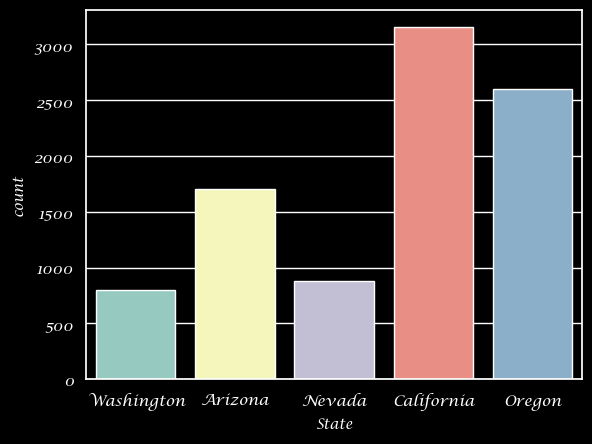

In [36]:
sns.countplot(x=df["State"])
plt.show()

Most number of people are residing in california

### Response

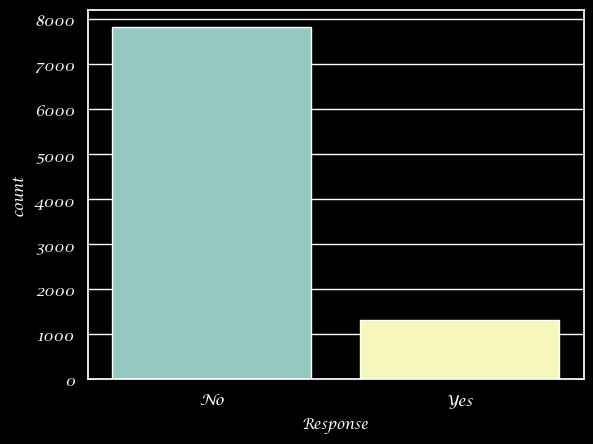

In [37]:
sns.countplot(x=df["Response"])
plt.show()

Its seems that less than 1400 customers have responded to the marketing calls

### Coverage

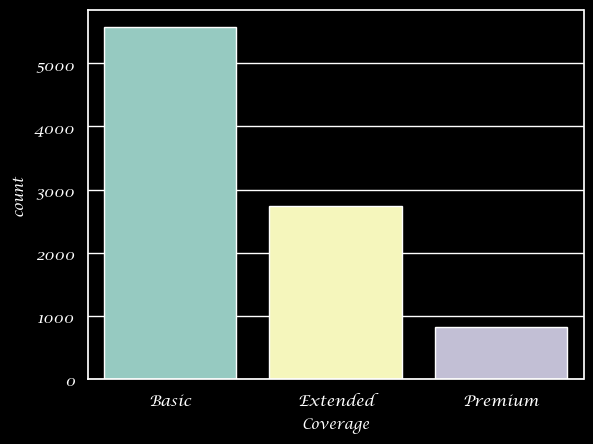

In [38]:
sns.countplot(x=df["Coverage"])
plt.show()

### Education

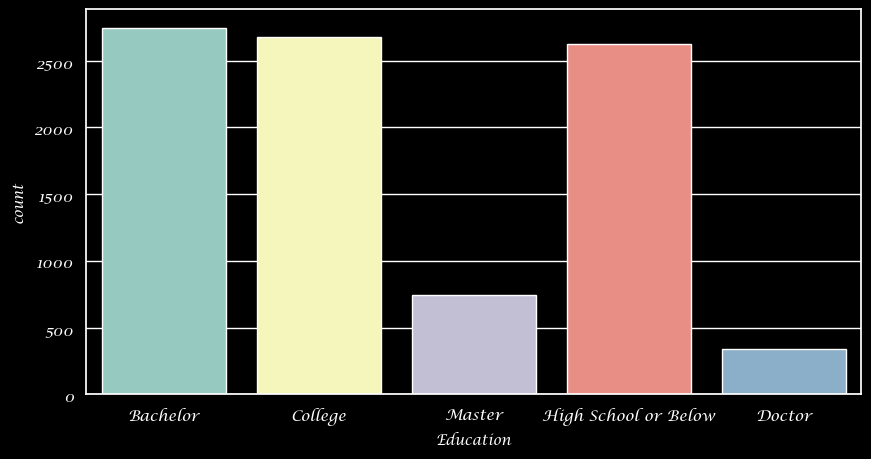

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Education"])
plt.show()

Most of the customers have either a bachelor or college degree

### EmploymentStatus

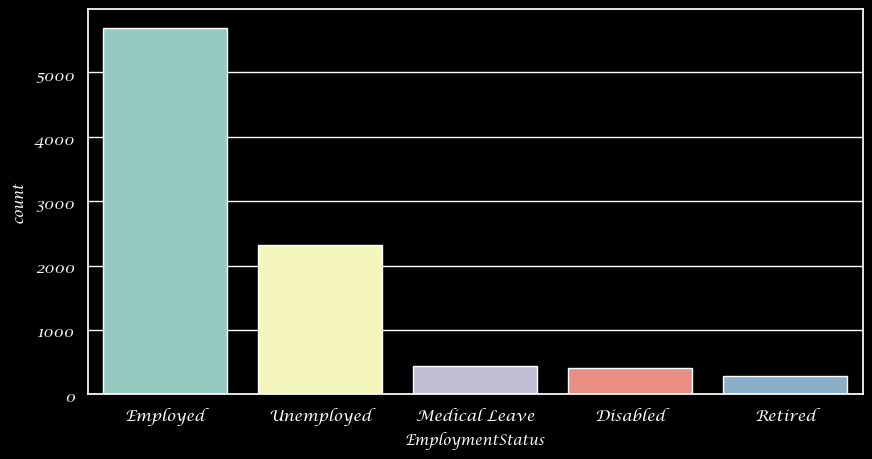

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["EmploymentStatus"])
# plt.savefig("empstatus.png")
plt.show()

In [41]:
df["EmploymentStatus"].value_counts(normalize=True)*100

Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: EmploymentStatus, dtype: float64

Around 62.38% of the customers are employed

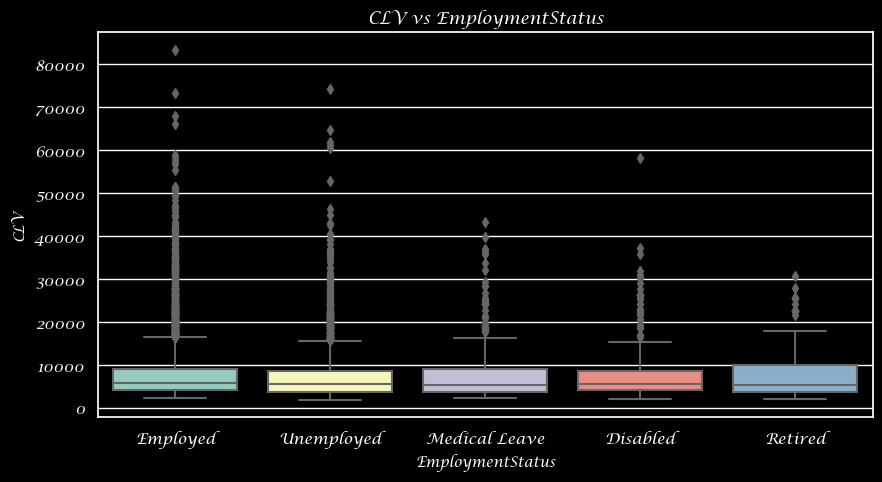

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['EmploymentStatus'],y=df['CLV'])
plt.title("CLV vs EmploymentStatus")
# plt.savefig("bi1.png")
plt.show()

### Gender

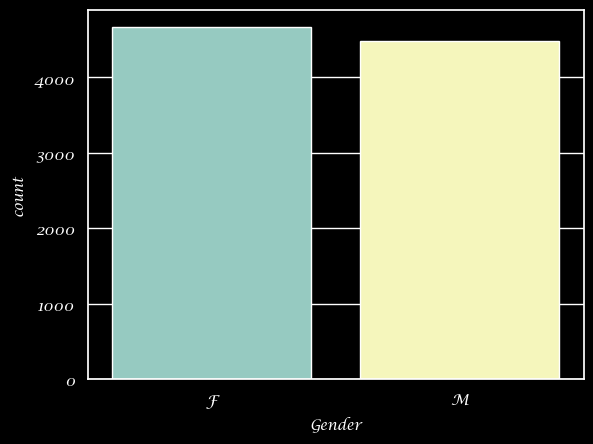

In [43]:
sns.countplot(x=df["Gender"])
plt.show()

### Location Code

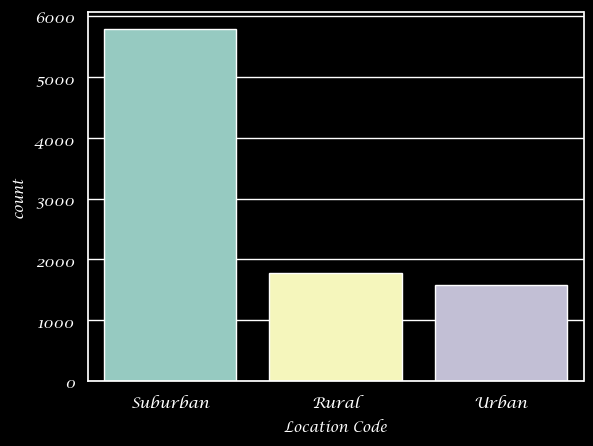

In [44]:
sns.countplot(x=df["Location Code"])
plt.savefig("location.png")
plt.show()

### Marital Status

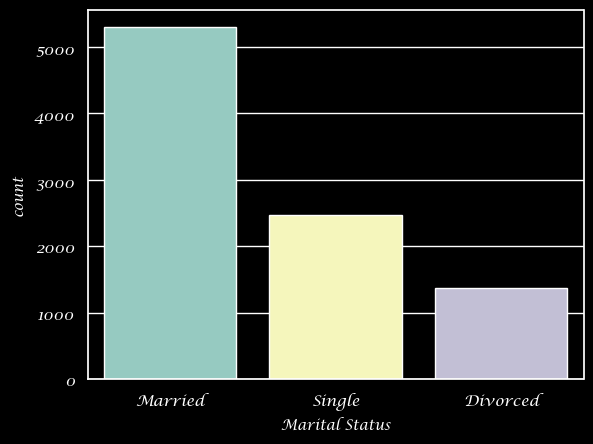

In [45]:
sns.countplot(x=df["Marital Status"])
plt.show()

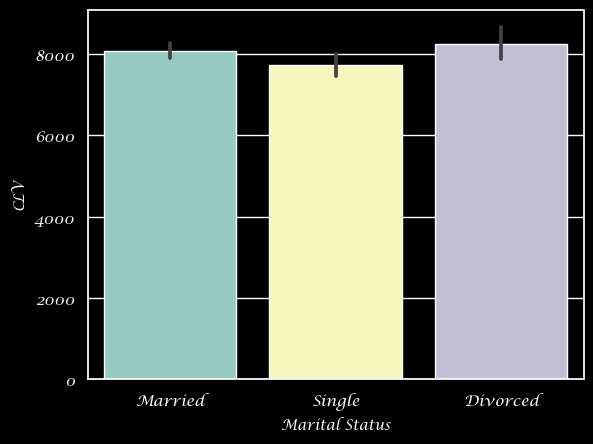

In [46]:

sns.barplot(x=df["Marital Status"],y=df["CLV"])
plt.show()

### Policy Type

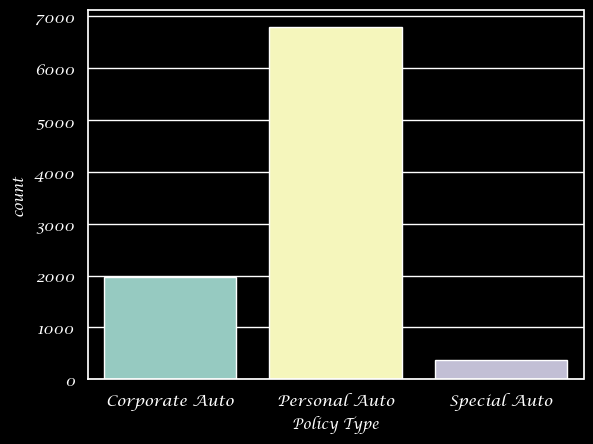

In [47]:
sns.countplot(x=df["Policy Type"])
plt.show()

### Policy

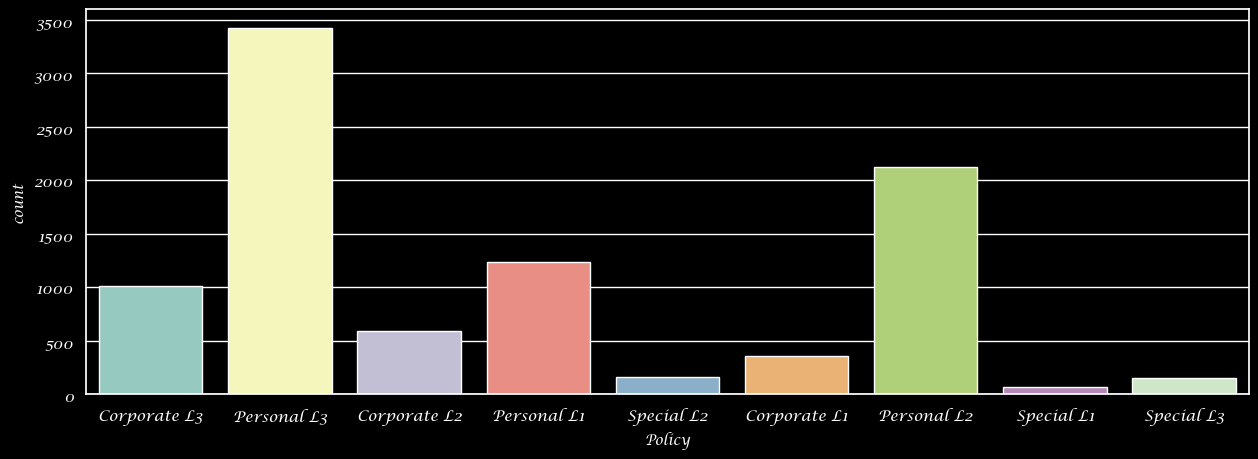

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["Policy"])
plt.show()

Personal L3 policy subcategory has the most number of customers

### Renew Offer type

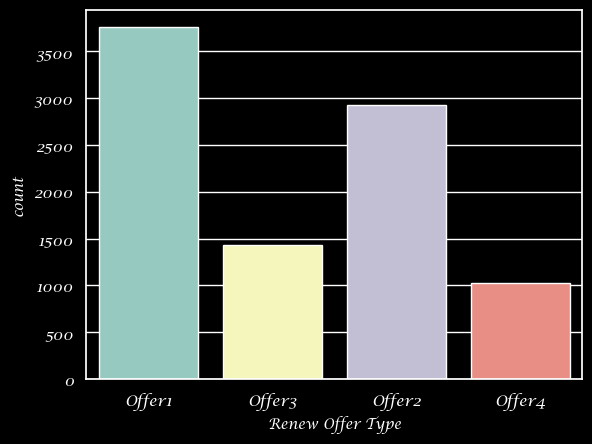

In [49]:
sns.countplot(x=df["Renew Offer Type"])
plt.show()

### Sales Channel

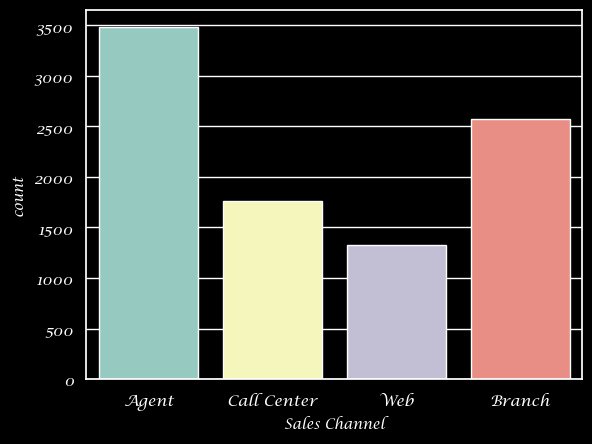

In [50]:
sns.countplot(x=df["Sales Channel"])
plt.show()

### Vehicle Class

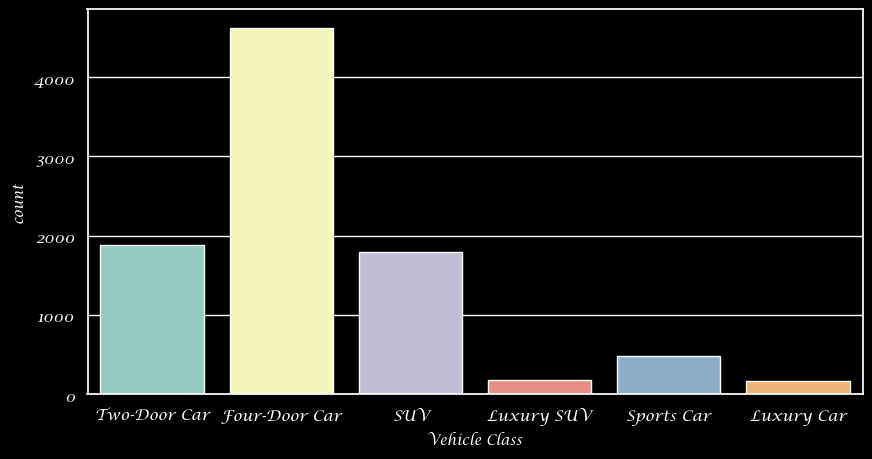

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Vehicle Class"])
plt.show()

### Vehicle Size

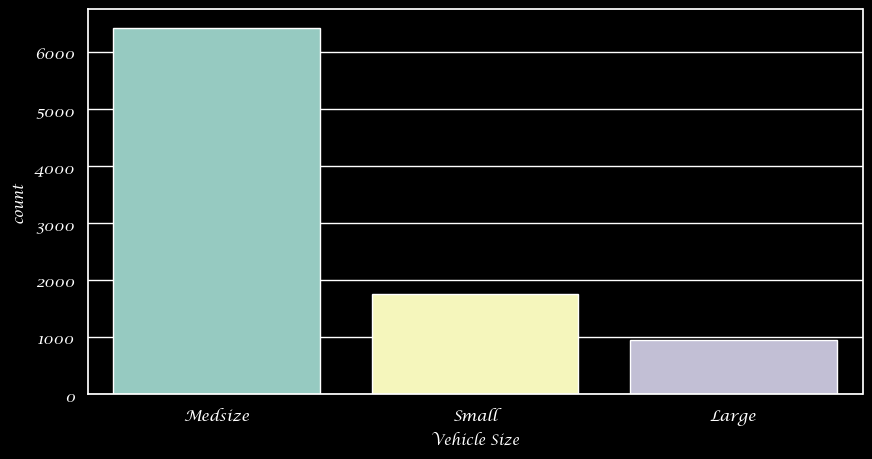

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Vehicle Size"])
plt.show()

### Number of Open Complaints

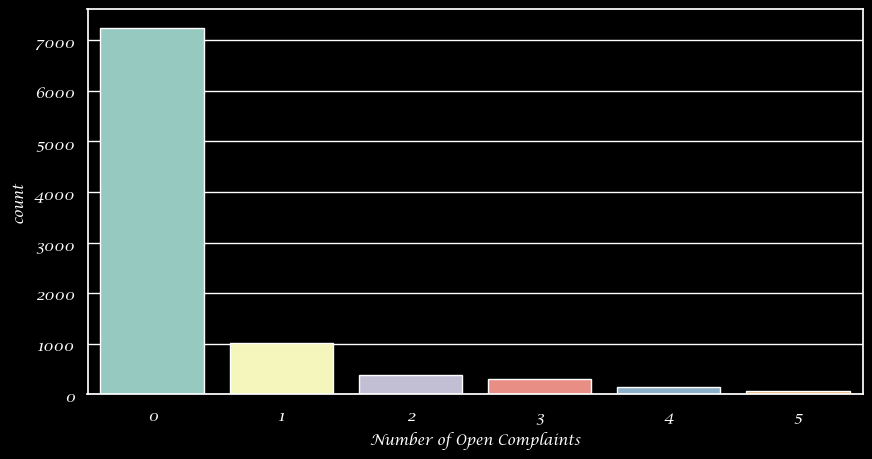

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Number of Open Complaints"])
plt.show()

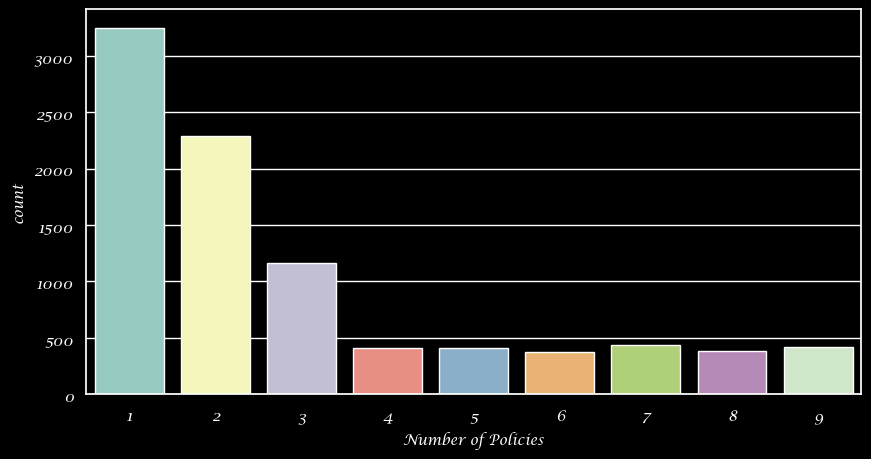

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Number of Policies"])
plt.show()

In [55]:
df['Effective To Date']=pd.to_datetime(df['Effective To Date'],infer_datetime_format=True)

In [56]:
df["Months"] = df["Effective To Date"].dt.month

In [57]:
df['Months'] = df['Months'].astype('object')

### Months

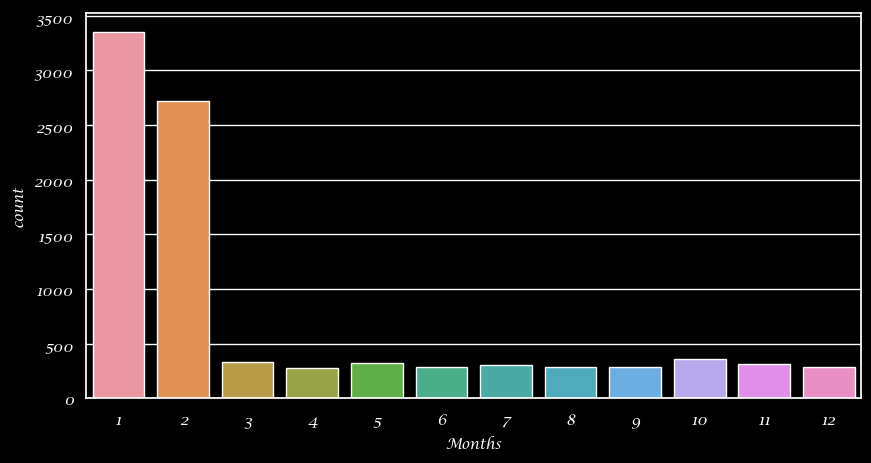

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Months"])
plt.show()

In [59]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [60]:
df.columns

Index(['Customer', 'State', 'CLV', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Months'],
      dtype='object')

## HeatMap

In [61]:
heatmap = df[['CLV', 'Income', 'Monthly Premium Auto','Total Claim Amount']]

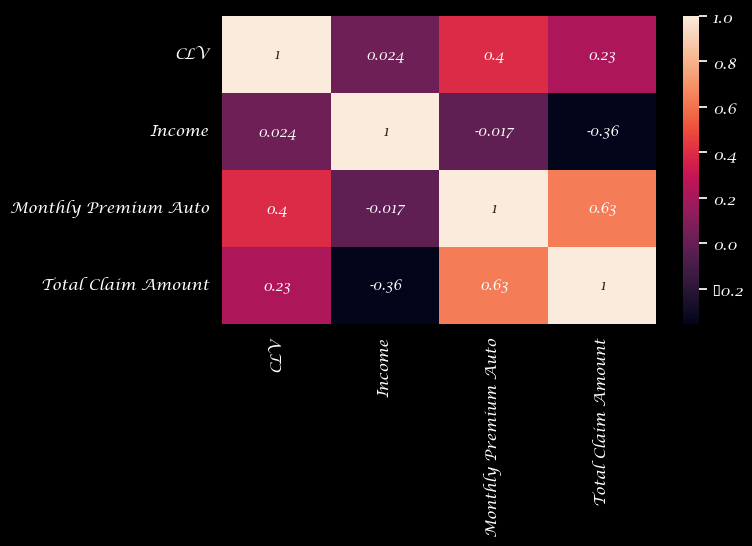

In [62]:
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
# plt.savefig("Heatmap.png")
plt.show()

We can clearly see in the heatmap, that customer lifetime value has a better correlation with monthly premium auto and acceptable correlation with total claim amount.


In [63]:
cat_cols.drop("Customer",axis=1,inplace=True)

In [64]:
cat_cols

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,0,2
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,0,1
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,3,2
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,0,3


In [65]:
numerical_cols.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [66]:
cat_cols.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


## Data Preprocessing

In [67]:
cat_cols.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [68]:
catg=pd.get_dummies(cat_cols,drop_first=True)

In [69]:
numerical_cols.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [70]:
dfn = pd.concat([numerical_cols,catg],axis=1)
dfn.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Number of Open Complaints,Number of Policies,State_California,State_Nevada,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,384.811147,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,1131.464935,0,8,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,566.472247,0,2,0,1,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,529.881344,0,7,1,0,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,138.130879,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## OLS Model

In [71]:
dfn.rename(columns={'CLV':'CLV'},inplace=True)

In [73]:
X=dfn.drop(['CLV'],axis=1)
y=dfn['CLV']


In [74]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=dfn['CLV']          
y =np.log(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [75]:
numerical_cols.rename(columns={'CLV':'CLV'},inplace=True)

In [76]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6393, 42)
(6393,)
(2741, 42)
(2741,)


## Model Building

## Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.26073373730563176
R^2 score for test: 0.25484160264997946


In [79]:
y_pred = model.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [81]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.577231415348726
MAE 0.4455033282270872
R-squared: 0.25484160264997946


## Rigde and Lasso Regression

In [82]:
from sklearn.linear_model import Ridge, Lasso

In [83]:
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
print('Ridge Regression')
y_pred = ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

Ridge Regression
RMSE: 0.5772298681232934
R-squared: 0.25484559732680356


In [84]:
ridge=Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
print('Ridge Regression')
y_pred = ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

Ridge Regression
RMSE: 0.5772172981328677
R-squared: 0.25487805053908263


In [85]:
lasso = Lasso(random_state=1)
lasso.fit(X_train,y_train)
print('Ridge Regression')
y_pred = lasso.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

Ridge Regression
RMSE: 0.5992937645386806
R-squared: 0.19679167777854611


## Decision Tree

In [86]:
from sklearn.tree import DecisionTreeRegressor

In [87]:
dt = DecisionTreeRegressor(random_state=1)

dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.2636910150910177
MAE 0.10343505564943467
R-squared: 0.8444967945595979


In [88]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=np.log(dfn['CLV'])         
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

## RandomForest 

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
rf = RandomForestRegressor(random_state=1)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.1961521558772452
MAE 0.08885672071039409
R-squared: 0.9139531744119158


## Hyperparameter tuning of random forest

In [91]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
params = {
        'max_depth' : [10,20,30],
        
        'n_estimators' : [100,200,50],
        
        "bootstrap" : [True, False],
    
        'max_features': ['auto', 'sqrt', 'log2']
        
        }

grid = GridSearchCV(estimator = rf, param_grid=params, cv = 5, n_jobs = -1, return_train_score = True )
grid.fit(X,y)
grid.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 100}

In [92]:
rf = RandomForestRegressor(**grid.best_params_)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.1964298883213546
MAE 0.08935676149540595
R-squared: 0.913709333973924


In [93]:
from sklearn.ensemble import AdaBoostRegressor

In [94]:
adaboost = AdaBoostRegressor(
    RandomForestRegressor(max_depth=5),
    n_estimators=150
)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=5),
                  n_estimators=150)

In [95]:
y_pred = adaboost.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.214053637312456
MAE 0.12882817957084772
R-squared: 0.8975306678707461
